In [439]:
import re
import string
import numpy as np
import pandas as pd
from nltk.stem.snowball import SnowballStemmer 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [51]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from collections import Counter

In [518]:
df = pd.read_csv('jobs/fake_job_postings.csv')

In [519]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [520]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

In [521]:
df_fake = df[df['fraudulent'] == 1]
df_real = df[df['fraudulent'] == 0]

In [522]:
df_fake.has_questions.value_counts()

0    616
1    250
Name: has_questions, dtype: int64

In [523]:
df_real.has_questions.value_counts()

1    8542
0    8472
Name: has_questions, dtype: int64

In [524]:
columns = ['job_id','telecommuting','has_company_logo','required_experience','required_education']
for col in columns:
    del df[col]

In [525]:
df.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,has_questions,employment_type,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,Other,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,Full-time,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,Full-time,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,1,Full-time,Hospital & Health Care,Health Care Provider,0


In [526]:
df.fillna('',inplace=True)

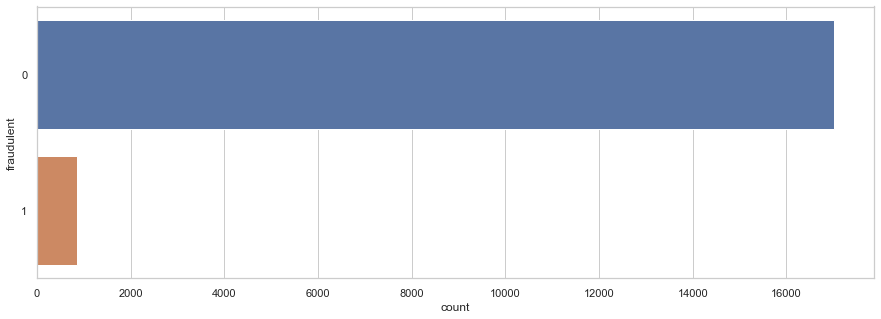

In [527]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data = df)
plt.show()

In [528]:
df['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [529]:
def split(location):
    l = location.split(",")
    return l[0]
df['location'] = df.location.apply(split)

In [530]:
df_fake = df[df['fraudulent'] == 1]
df_real = df[df['fraudulent'] == 0]

In [531]:
fake_country = dict(df_fake.location.value_counts()[:10])
real_country = dict(df_real.location.value_counts()[:10])


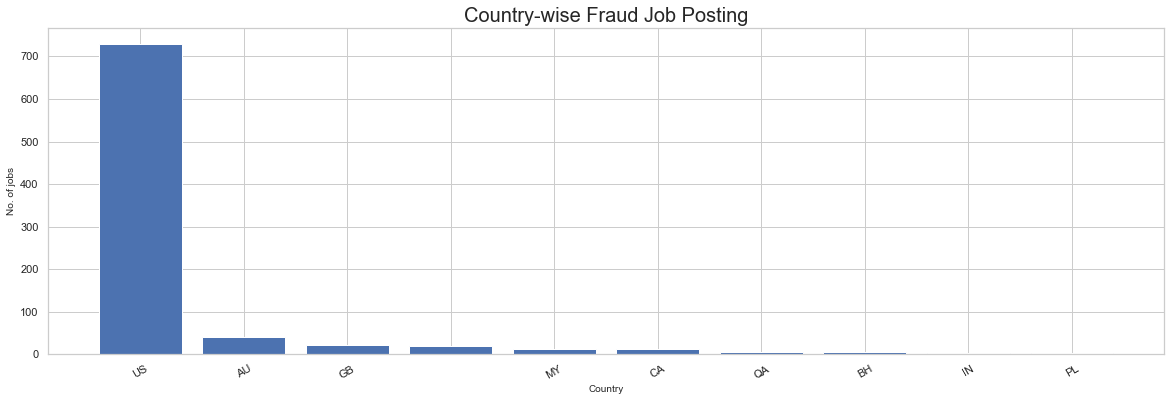

In [532]:
plt.figure(figsize=(20,6))
sns.set_theme(style='whitegrid')
plt.bar(fake_country.keys(),fake_country.values(),label='fake')

plt.title('Country-wise Fraud Job Posting',size=20)
plt.xlabel('Country', size=10)
plt.ylabel('No. of jobs' , size=10)
plt.xticks(rotation=30)

plt.show()

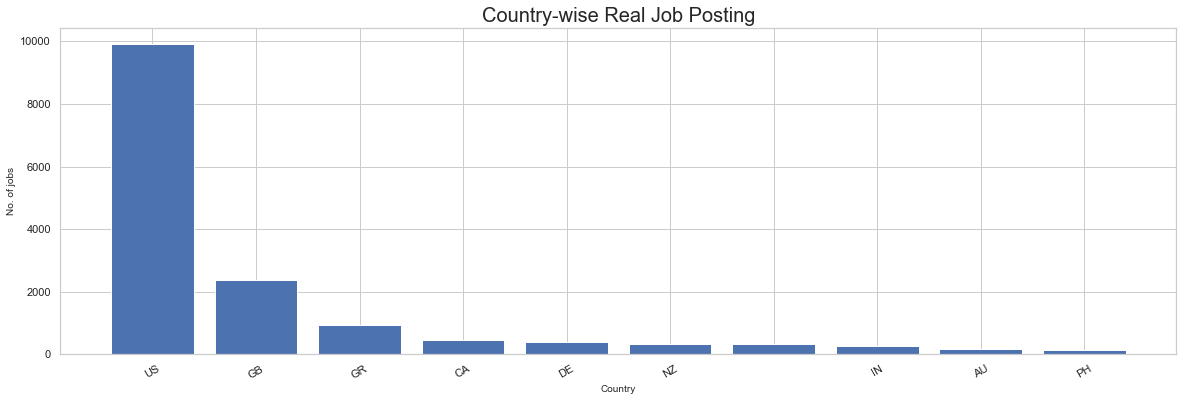

In [533]:
plt.figure(figsize=(20,6))
sns.set_theme(style='whitegrid')
plt.bar(real_country.keys(),real_country.values(),label='real')
plt.title('Country-wise Real Job Posting',size=20)
plt.xlabel('Country' , size=10)
plt.ylabel('No. of jobs' , size=10)
plt.xticks(rotation=30)

plt.show()

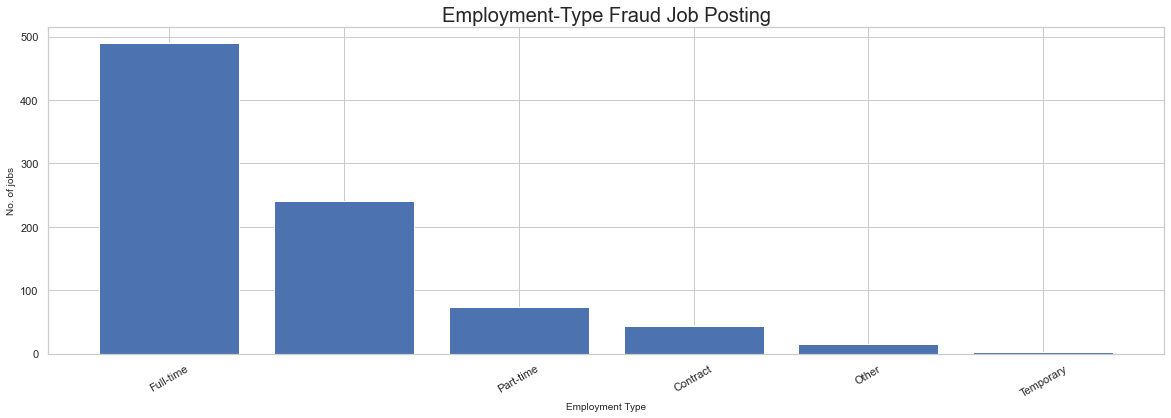

In [341]:
fake_employment_type = dict(df_fake.employment_type.value_counts()[:10])
plt.figure(figsize=(20,6))
sns.set_theme(style='whitegrid')
plt.bar(fake_employment_type.keys(),fake_employment_type.values(),label='fake')
plt.title('Employment-Type Fraud Job Posting',size=20)
plt.xlabel('Employment Type', size=10)
plt.ylabel('No. of jobs' , size=10)
plt.xticks(rotation=30)

plt.show()

In [534]:
def salary(value):
    if value != 0:
        return 1
    else:
        return 0
df['salary_range'] = df['salary_range'].apply(salary)

In [342]:
print(df[df.fraudulent == 0].title.value_counts())

English Teacher Abroad                                                                 311
Customer Service Associate                                                             146
Graduates: English Teacher Abroad (Conversational)                                     144
English Teacher Abroad                                                                  95
Software Engineer                                                                       86
                                                                                      ... 
HP3 4QR Customer Service Apprenticeship government funding for 16-18 year olds only      1
Customer Services Executive                                                              1
Executive Administrator / Office Manager                                                 1
Home Care Registered Nurse                                                               1
iOS App / UI Developer                                                                   1

In [343]:
print(df[df.fraudulent == 1].title.value_counts())

Data Entry Admin/Clerical Positions - Work From Home               21
Home Based Payroll Typist/Data Entry Clerks Positions Available    21
Cruise Staff Wanted *URGENT*                                       21
Customer Service Representative                                    17
Administrative Assistant                                           16
                                                                   ..
URGENT Part Timers & Full Timers Required.                          1
Market Specialists                                                  1
Clinical Director                                                   1
Intern Project Developer                                            1
Controls Engineer - Farmington Hills, MI                            1
Name: title, Length: 560, dtype: int64


In [535]:
df['text'] = df['title']+ ' ' + df['company_profile'] + ' ' + df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
del df['title']
del df['department']
del df['company_profile']
del df['description']
del df['requirements']
del df['benefits']
del df['industry']
del df['function']

In [536]:
df.head()

,location,salary_range,has_questions,employment_type,fraudulent,text
0,US,1,0,Other,0,"Marketing Intern We're Food52, and we've creat..."
1,NZ,1,0,Full-time,0,Customer Service - Cloud Video Production 90 S...
2,US,1,0,,0,Commissioning Machinery Assistant (CMA) Valor ...
3,US,1,0,Full-time,0,Account Executive - Washington DC Our passion ...
4,US,1,1,Full-time,0,Bill Review Manager SpotSource Solutions LLC i...


In [537]:
df.location.value_counts()

US    10656
GB     2384
GR      940
CA      457
DE      383
      ...  
AL        1
UG        1
SV        1
CO        1
SD        1
Name: location, Length: 91, dtype: int64

In [538]:
df.employment_type.value_counts()

Full-time    11620
              3471
Contract      1524
Part-time      797
Temporary      241
Other          227
Name: employment_type, dtype: int64

In [539]:
punctuations = string.punctuation
def clean_text(text):
    text = text.strip().lower()
    nopunc =[char for char in text if char not in string.punctuation and not char.isdigit()]
    nopunc=''.join(nopunc)
    list = [word for word in nopunc.split()]
    return " ".join([word for word in list])
df['text'] = df['text'].apply(clean_text)

In [540]:
df.head()

,location,salary_range,has_questions,employment_type,fraudulent,text
0,US,1,0,Other,0,marketing intern were food and weve created a ...
1,NZ,1,0,Full-time,0,customer service cloud video production second...
2,US,1,0,,0,commissioning machinery assistant cma valor se...
3,US,1,0,Full-time,0,account executive washington dc our passion fo...
4,US,1,1,Full-time,0,bill review manager spotsource solutions llc i...


In [541]:
df = df.rename(columns = {'location' : 'loc'})

In [542]:
df.to_csv('fake_jobs.csv')

In [543]:
df = pd.read_csv('fake_jobs.csv',index_col=0)

In [544]:
df.head()

,loc,salary_range,has_questions,employment_type,fraudulent,text
0,US,1,0,Other,0,marketing intern were food and weve created a ...
1,NZ,1,0,Full-time,0,customer service cloud video production second...
2,US,1,0,NaN,0,commissioning machinery assistant cma valor se...
3,US,1,0,Full-time,0,account executive washington dc our passion fo...
4,US,1,1,Full-time,0,bill review manager spotsource solutions llc i...


In [545]:
df.fillna('',inplace=True)

In [546]:
fraudjobs_text = df[df.fraudulent==1].text
realjobs_text = df[df.fraudulent==0].text

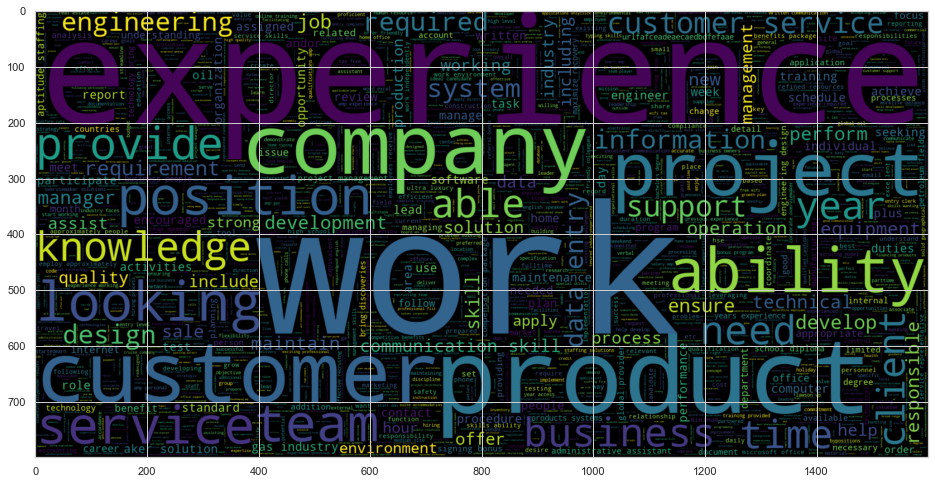

In [547]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size=3,max_words=3000,width = 1600,height = 800,stopwords=STOPWORDS).generate(str(" ".join(fraudjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

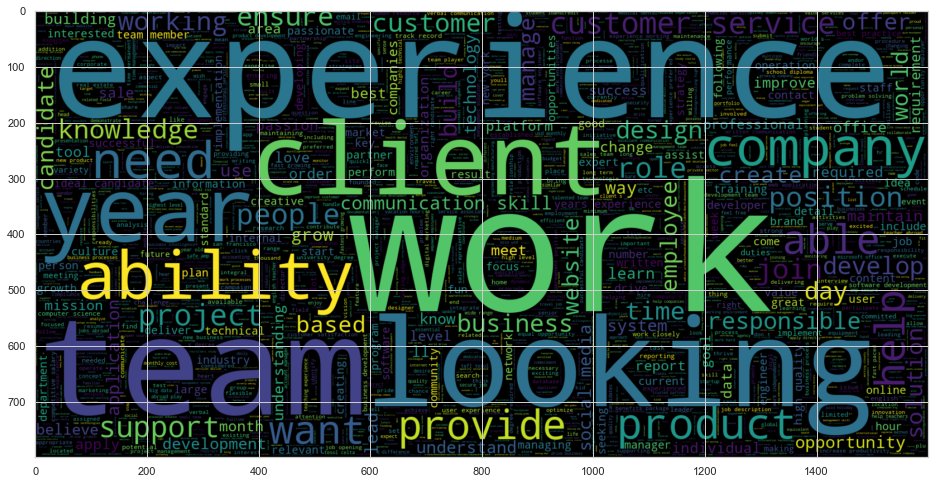

In [548]:
STOPWORDS = spacy.lang.en.stop_words.STOP_WORDS
plt.figure(figsize=(16,14))
wc = WordCloud(min_font_size=3,max_words=3000,width = 1600,height = 800,stopwords=STOPWORDS).generate(str(" ".join(realjobs_text)))
plt.imshow(wc,interpolation = 'bilinear')

In [549]:
enc = LabelEncoder()
df.loc[:,['employment_type','loc']] = df.loc[:,['employment_type','loc']].apply(enc.fit_transform)

In [550]:
df.head()

,loc,salary_range,has_questions,employment_type,fraudulent,text
0,86,1,0,3,0,marketing intern were food and weve created a ...
1,61,1,0,2,0,customer service cloud video production second...
2,86,1,0,0,0,commissioning machinery assistant cma valor se...
3,86,1,0,2,0,account executive washington dc our passion fo...
4,86,1,1,2,0,bill review manager spotsource solutions llc i...


In [551]:
tf = TfidfVectorizer(max_features=2000)

In [552]:
df1 = pd.DataFrame(tf.fit_transform(df['text']).toarray(),columns=tf.get_feature_names())
df.drop(['text'],axis=1,inplace=True)
main_df = pd.concat([df1,df],axis=1)

In [553]:
main_df.head()

,abilities,ability,able,about,above,abroad,academic,accept,access,accordance,...,youre,yourself,zealand,και,να,loc,salary_range,has_questions,employment_type,fraudulent
0,0.0,0.000000,0.000000,0.026155,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,86,1,0,3,0
1,0.0,0.000000,0.013815,0.049969,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.023901,0.0,0.0,0.0,61,1,0,2,0
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.062852,...,0.0,0.000000,0.0,0.0,0.0,86,1,0,0,0
3,0.0,0.017016,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,86,1,0,2,0
4,0.0,0.000000,0.028857,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.0,86,1,1,2,0


In [568]:
features = main_df.drop(['fraudulent'],axis=1)
target = main_df['fraudulent']

In [168]:
!pip install -U imbalanced-learn

In [569]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(features,target,random_state=0,test_size=0.3)
print("Before smote - Train : " ,Counter(y_train))

Before smote - Train :  Counter({0: 11877, 1: 639})


In [570]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_test = np.asarray(x_test)
y_test = np.asarray(y_test)

In [571]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=100

In [572]:
#rfc = RandomForestClassifier(n_jobs = 3,n_estimators=100,criterion="entropy")
#model = rfc.fit(x_train,y_train)
model = Sequential()
model.add(Dense(units=150, activation='tanh'))
model.add(Dense(units=100, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(
    x=x_train,
    y=y_train,
    epochs=100,
    shuffle=True,
    verbose=2,
    batch_size = 20,
)

Epoch 1/100
626/626 - 3s - loss: 0.1390 - accuracy: 0.9574
Epoch 2/100
626/626 - 1s - loss: 0.0652 - accuracy: 0.9784
Epoch 3/100
626/626 - 1s - loss: 0.0526 - accuracy: 0.9816
Epoch 4/100
626/626 - 1s - loss: 0.0384 - accuracy: 0.9870
Epoch 5/100
626/626 - 1s - loss: 0.0306 - accuracy: 0.9885
Epoch 6/100
626/626 - 1s - loss: 0.0253 - accuracy: 0.9905
Epoch 7/100
626/626 - 1s - loss: 0.0231 - accuracy: 0.9921
Epoch 8/100
626/626 - 1s - loss: 0.0194 - accuracy: 0.9930
Epoch 9/100
626/626 - 1s - loss: 0.0172 - accuracy: 0.9933
Epoch 10/100
626/626 - 1s - loss: 0.0157 - accuracy: 0.9945
Epoch 11/100
626/626 - 1s - loss: 0.0145 - accuracy: 0.9946
Epoch 12/100
626/626 - 1s - loss: 0.0143 - accuracy: 0.9943
Epoch 13/100
626/626 - 1s - loss: 0.0062 - accuracy: 0.9981
Epoch 14/100
626/626 - 1s - loss: 0.0116 - accuracy: 0.9966
Epoch 15/100
626/626 - 1s - loss: 0.0047 - accuracy: 0.9985
Epoch 16/100
626/626 - 1s - loss: 0.0057 - accuracy: 0.9978
Epoch 17/100
626/626 - 1s - loss: 0.0126 - accura

In [573]:
pred = model.predict(x_test)

In [574]:
pred

array([[2.1934704e-10],
       [4.6480583e-11],
       [2.3887406e-10],
       ...,
       [2.2177776e-10],
       [2.2832990e-10],
       [4.4964383e-09]], dtype=float32)

In [575]:
pred = [int(round(x[0])) for x in pred]

In [576]:
confusion_matrix(y_test,pred)

array([[5082,   55],
       [  44,  183]], dtype=int64)

In [577]:
sm = SMOTE(k_neighbors=3,random_state = 1)
x_train_smote , y_train_smote = sm.fit_resample(x_train,y_train)

In [578]:
print("After smote - Train : " ,Counter(y_train_smote))

After smote - Train :  Counter({0: 11877, 1: 11877})


In [579]:
x_train_smote = np.asarray(x_train_smote)
y_train_smote = np.asarray(y_train_smote)

In [580]:
model.fit(
    x=x_train_smote,
    y=y_train_smote,
    epochs=100,
    shuffle=True,
    verbose=2,
    batch_size = 20,
)
pred = model.predict(x_test)


Epoch 1/100
1188/1188 - 3s - loss: 1.6279e-09 - accuracy: 1.0000
Epoch 2/100
1188/1188 - 2s - loss: 0.0201 - accuracy: 0.9976
Epoch 3/100
1188/1188 - 2s - loss: 4.3265e-05 - accuracy: 1.0000
Epoch 4/100
1188/1188 - 2s - loss: 1.7019e-05 - accuracy: 1.0000
Epoch 5/100
1188/1188 - 2s - loss: 7.7393e-06 - accuracy: 1.0000
Epoch 6/100
1188/1188 - 3s - loss: 3.9612e-06 - accuracy: 1.0000
Epoch 7/100
1188/1188 - 3s - loss: 2.2108e-06 - accuracy: 1.0000
Epoch 8/100
1188/1188 - 3s - loss: 1.2848e-06 - accuracy: 1.0000
Epoch 9/100
1188/1188 - 3s - loss: 7.3851e-07 - accuracy: 1.0000
Epoch 10/100
1188/1188 - 3s - loss: 4.2780e-07 - accuracy: 1.0000
Epoch 11/100
1188/1188 - 3s - loss: 2.3548e-07 - accuracy: 1.0000
Epoch 12/100
1188/1188 - 4s - loss: 1.3711e-07 - accuracy: 1.0000
Epoch 13/100
1188/1188 - 4s - loss: 7.8165e-08 - accuracy: 1.0000
Epoch 14/100
1188/1188 - 4s - loss: 4.7198e-08 - accuracy: 1.0000
Epoch 15/100
1188/1188 - 4s - loss: 2.9881e-08 - accuracy: 1.0000
Epoch 16/100
1188/1188 

In [581]:
pred = model.predict(x_test)
pred = [int(round(x[0])) for x in pred]
confusion_matrix(y_test,pred)

array([[5082,   55],
       [  48,  179]], dtype=int64)

In [376]:
counts = Counter(y_train_smote)

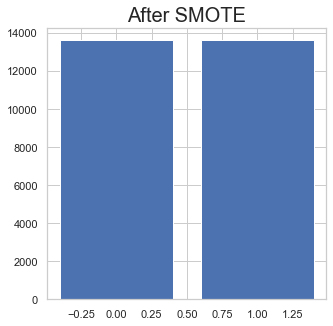

In [378]:
plt.figure(figsize=(5,5))
sns.set_theme(style='whitegrid')
plt.bar(counts.keys(),counts.values())

plt.title('After SMOTE',size=20)
plt.show()

In [383]:
smote_df = x_train_smote
smote_df['fraudulent'] = y_train_smote

In [384]:
smote_df.head()

,abilities,ability,able,about,above,abroad,academic,accept,access,accordance,...,your,youre,yourself,zealand,και,να,loc,has_questions,employment_type,fraudulent
0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,28,1,5,0
1,0.0,0.0,0.033352,0.030158,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,28,1,2,0
2,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.127642,0.0,0.0,0.0,0.0,0.0,86,1,2,0
3,0.0,0.0,0.000000,0.047592,0.0,0.0,0.0,0.0,0.037507,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,21,1,2,0
4,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,86,0,3,0


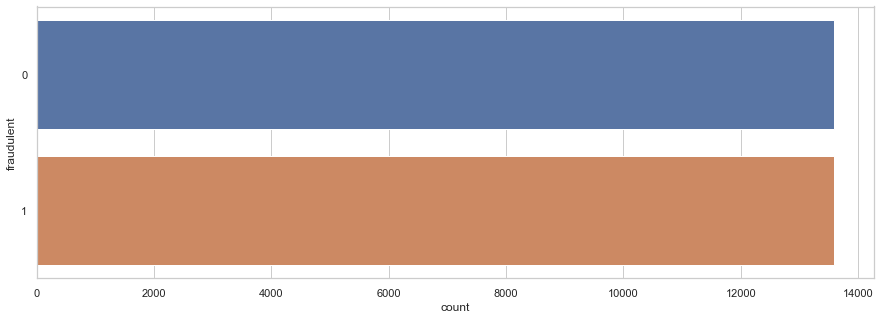

In [385]:
plt.figure(figsize=(15,5))
sns.countplot(y='fraudulent',data = smote_df)
plt.show()

In [497]:
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report, confusion_matrix
pred = rfc.predict(x_test)
score = accuracy_score(y_test, pred)
score

0.9821029082774049